# GLOBAL ECONOMY INDICATOR

In [1]:
import numpy as np
import pandas as pd

In [2]:
PATH = r"../data/Global_Economy_Indicators.csv"
df = pd.read_csv(PATH)
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [3]:
df.columns

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

# Top 5 countries by average GDP

In [4]:
df_top = df.groupby(" Country ")[" Gross Domestic Product (GDP) "].mean().sort_values(ascending=False).head()
df_top

 Country 
United States      9.321346e+12
Japan              3.417731e+12
China              3.372873e+12
Germany            2.095904e+12
United Kingdom     1.515096e+12
Name:  Gross Domestic Product (GDP) , dtype: float64

# Countries with the highest inflation in the most recent year

In [5]:
df_inflation = df.groupby([" Country "," Year "])[" Population "].max().sort_index(ascending=False)
df_inflation

 Country       Year 
Zimbabwe      2021      15993524
              2020      15669666
              2019      15354608
              2018      15052184
              2017      14751101
                          ...   
Afghanistan   1974      11869879
              1973      11575305
              1972      11286753
              1971      11015857
              1970      10752971
Name:  Population , Length: 10512, dtype: int64

# Mean GDP per capita

In [6]:
df_capita = df.groupby(" Country ")[[" Gross Domestic Product (GDP) "," Per capita GNI "]].mean()
df_capita

,Gross Domestic Product (GDP),Per capita GNI
Country,,
Afghanistan,7.094304e+09,313.403846
Albania,5.996965e+09,2052.807692
Algeria,8.267588e+10,2530.923077
Andorra,1.719792e+09,26166.826923
Angola,3.650808e+10,1527.615385
...,...,...
Yemen Democratic (Former),3.406513e+08,155.809524
Yugoslavia (Former),5.617382e+10,2561.857143
Zambia,8.983579e+09,696.692308


# Total exports over all years

In [7]:
df_totalExport = df.groupby([" Country "," Year "])[" Exports of goods and services "].sum()
df_totalExport

 Country       Year 
Afghanistan   1970      1.656187e+08
              1971      1.935803e+08
              1972      2.276544e+08
              1973      2.269136e+08
              1974      2.849384e+08
                            ...     
Zimbabwe      2017      5.434790e+09
              2018      6.186541e+09
              2019      6.137453e+09
              2020      5.614855e+09
              2021      6.128771e+09
Name:  Exports of goods and services , Length: 10512, dtype: float64

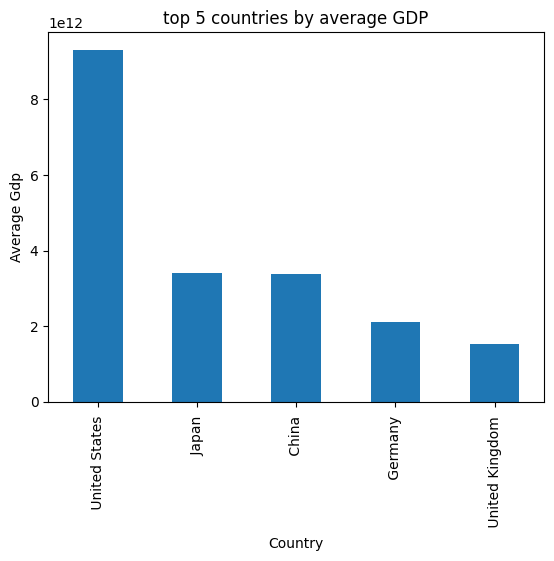

In [8]:
import matplotlib.pyplot as plt

plt.title("top 5 countries by average GDP")
df_top.plot(kind='bar')
plt.ylabel("Average Gdp")
plt.xlabel("Country")
plt.show()

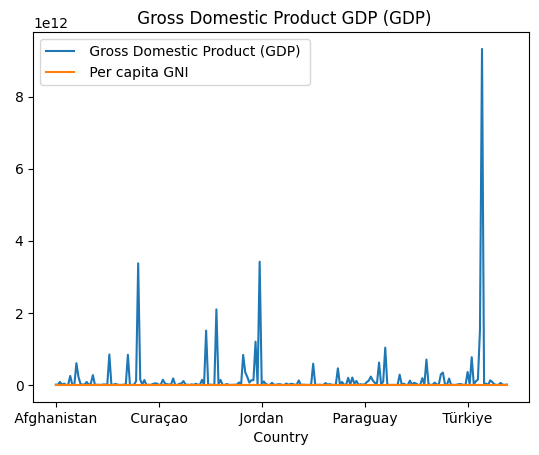

In [9]:

df_capita.plot(kind='line')
plt.title(" Gross Domestic Product GDP (GDP)")
plt.show()

<Figure size 1000x600 with 0 Axes>

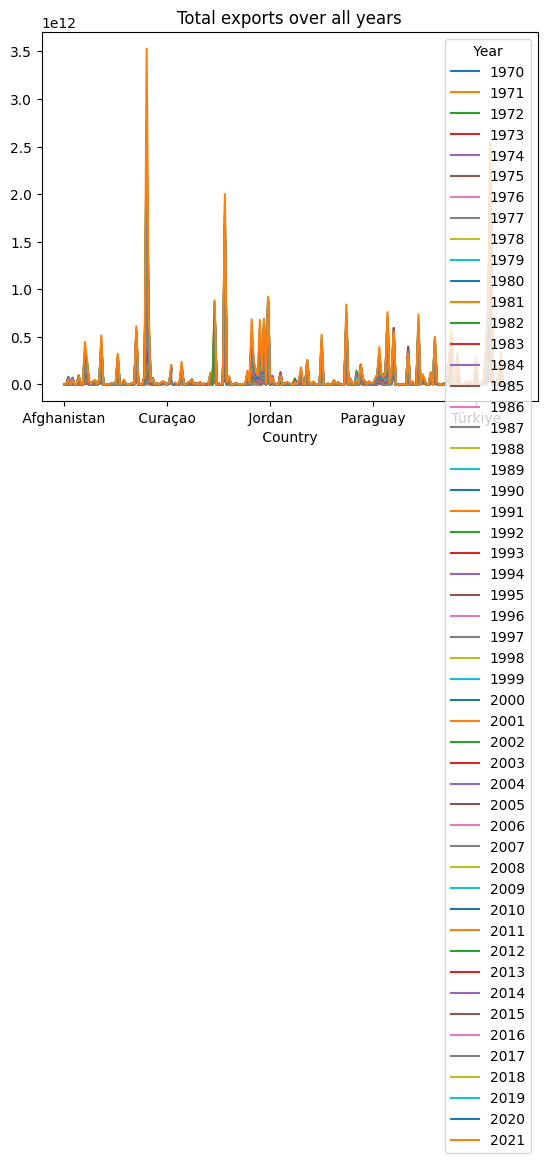

In [12]:
plt.figure(figsize=(10, 6))
df_totalExport.unstack().plot(kind='line')
plt.title("Total exports over all years")
plt.show()